# **Data Analysis Notebook**

## Objectives

* 1.

## Inputs

* 2

## Outputs

* 3

---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Project5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Project5'

# Analyse combined dataset

### Load the data

In [22]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/BitCoinVsMacroNasdaq.csv"))
df.head()

,Date,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,TEDSpread,EFFR,Gold,Oil,M2_Money_Supply,10Y Treasury Yield,Fed Funds Rate,CPI,Inflation_Rate_%,SOFR,BitCoin_Close
0,2018-04-03,28.526667,28.903334,28.366667,28.883333,4917300.0,1.69,1.2261,21.10,0.60,1.69,1332.800049,63.509998,13993.9,2.87,1.69,250.227,2.470996,1.83,7061.622526
1,2018-04-04,28.469999,28.799999,28.379999,28.740000,3822600.0,1.69,1.2292,20.06,0.64,1.69,1335.800049,63.369999,13993.9,2.87,1.69,250.227,2.470996,1.74,7454.691790
2,2018-04-05,28.833332,28.980000,28.670000,28.770000,3174300.0,1.69,1.2230,18.94,0.64,1.69,1324.300049,63.540001,13993.9,2.87,1.69,250.227,2.470996,1.75,6840.936110
3,2018-04-06,28.633333,28.730000,28.163334,28.400000,2808000.0,1.69,1.2274,21.49,0.64,1.69,1331.900024,62.060001,13993.9,2.87,1.69,250.227,2.470996,1.75,6819.726657
4,2018-04-09,28.486668,28.886667,28.320000,28.430000,1798200.0,1.69,1.2320,21.77,0.61,1.69,1336.300049,63.419998,13993.9,2.87,1.69,250.227,2.470996,1.75,7000.923355


### Drop unnecessary columns & rename others for clarity

* Drop open, low and high prices as we're only interested in the close prices.  Also drop InterestRate & EFFR as these are duplicated with Fed Funds Rate

* Rename Close and Volume columns for better clarity

In [23]:
df.drop(columns=['Open', 'Low', 'High', 'InterestRate', 'EFFR'], inplace=True)
df.rename(columns={
    'Close': 'Nasdaq_Close',
    'Volume': 'Nasdaq_Volume',
    }, inplace=True)
df.head()


,Date,Nasdaq_Close,Nasdaq_Volume,ExchangeRate,VIX,TEDSpread,Gold,Oil,M2_Money_Supply,10Y Treasury Yield,Fed Funds Rate,CPI,Inflation_Rate_%,SOFR,BitCoin_Close
0,2018-04-03,28.883333,4917300.0,1.2261,21.10,0.60,1332.800049,63.509998,13993.9,2.87,1.69,250.227,2.470996,1.83,7061.622526
1,2018-04-04,28.740000,3822600.0,1.2292,20.06,0.64,1335.800049,63.369999,13993.9,2.87,1.69,250.227,2.470996,1.74,7454.691790
2,2018-04-05,28.770000,3174300.0,1.2230,18.94,0.64,1324.300049,63.540001,13993.9,2.87,1.69,250.227,2.470996,1.75,6840.936110
3,2018-04-06,28.400000,2808000.0,1.2274,21.49,0.64,1331.900024,62.060001,13993.9,2.87,1.69,250.227,2.470996,1.75,6819.726657
4,2018-04-09,28.430000,1798200.0,1.2320,21.77,0.61,1336.300049,63.419998,13993.9,2.87,1.69,250.227,2.470996,1.75,7000.923355


### Perform correlation & PPS review

In [27]:
corr_spearman = df.corr(method='spearman', numeric_only=True)['BitCoin_Close'].drop('BitCoin_Close').apply(abs).sort_values(ascending=False).head(10)
corr_spearman

Nasdaq_Close          0.846459
CPI                   0.805737
Gold                  0.788230
M2_Money_Supply       0.747256
TEDSpread             0.746727
Oil                   0.545569
Inflation_Rate_%      0.525562
10Y Treasury Yield    0.272312
ExchangeRate          0.155466
Fed Funds Rate        0.109809
Name: BitCoin_Close, dtype: float64

In [28]:
corr_pearson = df.corr(method='pearson', numeric_only=True)['BitCoin_Close'].drop('BitCoin_Close').apply(abs).sort_values(ascending=False).head(10)
corr_pearson

Nasdaq_Close          0.812017
Gold                  0.780432
M2_Money_Supply       0.737058
CPI                   0.675374
TEDSpread             0.494375
Oil                   0.458308
Inflation_Rate_%      0.342312
10Y Treasury Yield    0.309140
Fed Funds Rate        0.253337
SOFR                  0.244014
Name: BitCoin_Close, dtype: float64

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()

def CalculateCorrAndPPS(df):
    corr_spearman = df.corr(method="spearman", numeric_only=True)
    corr_pearson = df.corr(method="pearson", numeric_only=True)

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return corr_pearson, corr_spearman, pps_matrix

def DisplayCorrAndPPS(corr_pearson, corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    heatmap_corr(df=corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    heatmap_corr(df=corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [48]:
corr_pearson, corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

/home/cistudent/.local/lib/python3.12/site-packages/ppscore/calculation.py:201: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dtype(series)
/home/cistudent/.local/lib/python3.12/site-packages/ppscore/calculation.py:201: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dtype(series)
/home/cistudent/.local/lib/python3.12/site-packages/ppscore/calculation.py:201: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dtype(series)
/home/cistudent/.local/lib/python3.12/site-packages/ppscore/calculation.py:201: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dt

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%    50%    75%  max
ppscore  210.0  0.394  0.369  0.0  0.0  0.323  0.747  1.0


/home/cistudent/.local/lib/python3.12/site-packages/ppscore/calculation.py:201: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dtype(series)
/home/cistudent/.local/lib/python3.12/site-packages/ppscore/calculation.py:201: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dtype(series)
/home/cistudent/.local/lib/python3.12/site-packages/ppscore/calculation.py:201: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dtype(series)
/home/cistudent/.local/lib/python3.12/site-packages/ppscore/calculation.py:201: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dt



*** Heatmap: Spearman Correlation ***


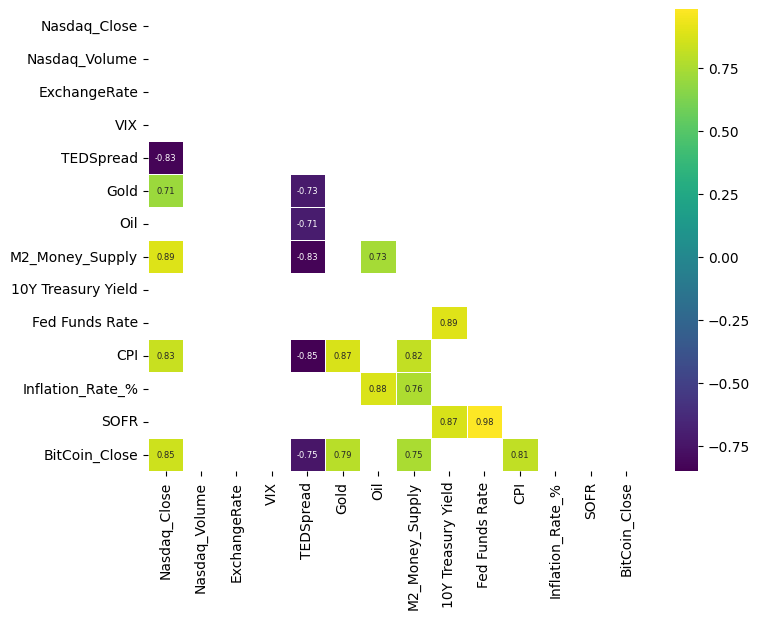



*** Heatmap: Pearson Correlation ***


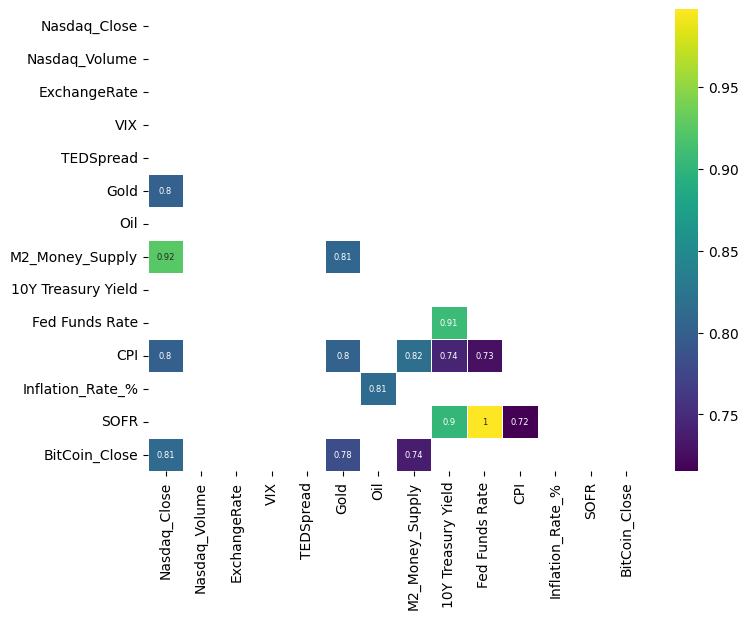



*** Heatmap: Power Predictive Score (PPS) ***


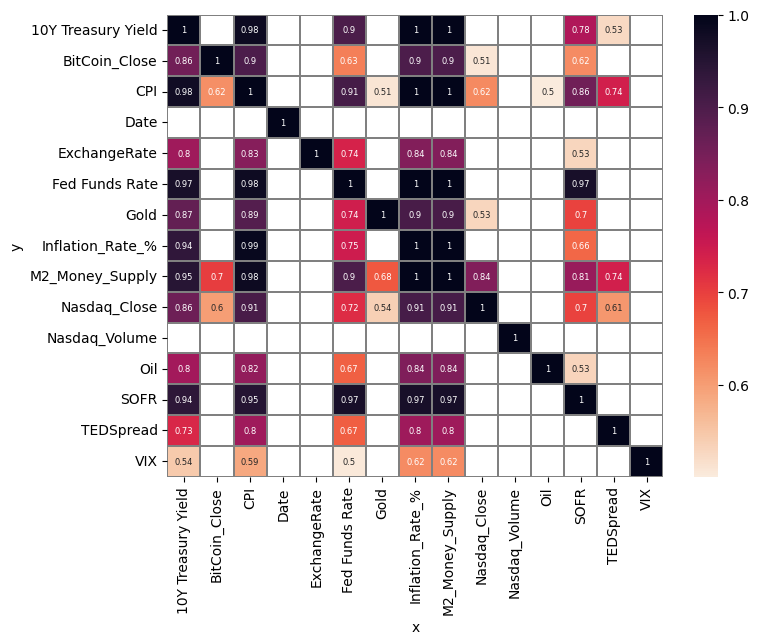

In [50]:
DisplayCorrAndPPS(corr_pearson = corr_pearson,
                  corr_spearman = corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.7, PPS_Threshold =0.5,
                  figsize=(8,6), font_annot=6)